The goal of this notebook is to study how to **fetch IoT timeseries data from the server-side TimescaleDB** and how to **visualize them with Python plotting libraries** effectively. Proper **data sampling rate** needs to be investigated as well in this notebook. For this notebook, online materials listed below are used:
* Installation, DB Connection, and PostgreSQL querying: https://medium.com/analytics-vidhya/postgresql-integration-with-jupyter-notebook-deb97579a38d
* Using PostgreSQL meta-commands: https://medium.com/data-analysis-for-beginners/bring-native-psql-magic-into-jupyter-notebook-50b663d856b5
* Using masic function % for storing data to variables: https://towardsdatascience.com/heres-how-to-run-sql-in-jupyter-notebooks-f26eb90f3259

## Loading libraries and connecting to DB

In [3]:
import sqlalchemy
from sqlalchemy import create_engine
from IPython.display import display_html

In [4]:
%load_ext sql

In [5]:
%sql postgresql://postgres@localhost/homedata

'Connected: postgres@homedata'

In [6]:
engine = create_engine('postgresql://postgres@localhost/homedata')

## Query Example: Printing top 3 rows

In [6]:
%%sql

select * from sensor_data limit 3

 * postgresql://postgres@localhost/homedata
3 rows affected.


db_insert_time,room,data_gen_time,sound1,sound2,temperature,humidity,light,motion,airquality,dustconcentration
2020-04-26 14:44:33.240067-04:00,hroom-1,2020-04-26 14:44:33-04:00,"[38.84491, 41.548523, 43.78904, 37.553318, 34.932198, 34.789368, 35.375282, 37.072533, 36.9852, 38.804432]","[34.714874, 44.053913, 40.614216, 37.209526, 34.59998, 34.460262, 34.454475, 36.158672, 35.970127, 37.8359]",28.289,29.041,95.67,2.5499,None,None
2020-04-26 14:44:34.464842-04:00,hroom-1,2020-04-26 14:44:34-04:00,"[37.034363, 42.94117, 43.11823, 36.212498, 34.61035, 34.721, 34.98621, 36.95212, 37.28573, 38.667828]","[33.202198, 42.82431, 40.96828, 36.672382, 34.514984, 36.18337, 34.71283, 36.63037, 36.36674, 38.095177]",28.236,29.047,95.79,2.57324,None,None
2020-04-26 14:44:35.536709-04:00,hroom-2,2020-04-26 09:44:35-04:00,"[36.57462, 40.622955, 47.64065, 37.1816, 36.083546, 35.031864, 35.373005, 37.80639, 37.482098, 38.176067]","[37.725174, 41.904285, 44.440018, 37.784557, 35.9873, 35.374237, 35.76456, 38.074524, 38.428814, 39.666794]",20.059,36.423,72.63,2.78305,None,None


## PSQL Meta-commands: Printing out the total count of inserted data rows 

In [522]:
%%sql
select count(*) from user_activity

 * postgresql://postgres@localhost/homedata
1 rows affected.


count
102


In [8]:
host='localhost'
database='homedata'
username='postgres'

### psql_cmd examples
# \dt : prints data tables
# \d sensor_data : prints sensor_data table schema
# \l+ homedata : prints database size
###
psql_cmd = input("Enter psql command to execute: ")
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Enter psql command to execute:  \dt


Schema,Name,Type,Owner
public,sensor_data,table,postgres
public,sensordata,table,postgres


In [26]:
psql_cmd = "\d sensor_data"
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Column,Type,Collation,Nullable,Default
db_insert_time,timestamp with time zone,,not null,
room,text,,not null,
data_gen_time,timestamp with time zone,,,
sound1,real[],,,
sound2,real[],,,
temperature,real,,,
humidity,real,,,
light,real,,,
motion,real,,,
airquality,text,,,


In [539]:
psql_cmd = "\l+ homedata"
psql_out = !psql -H -h "{host}" -d "{database}" -U "{username}" -c "{psql_cmd}"
display_html(''.join(psql_out), raw=True)

Name,Owner,Encoding,Collate,Ctype,Access privileges,Size,Tablespace,Description
homedata,postgres,UTF8,C,C,,364 MB,pg_default,


## Querying and visualizing data: Magic function % and pandas DataFrame

In [78]:
hroom1_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-1'
hroom2_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-2'
df1 = hroom1_result.DataFrame()
df2 = hroom2_result.DataFrame()

 * postgresql://postgres@localhost/homedata
18805 rows affected.
 * postgresql://postgres@localhost/homedata
18808 rows affected.


In [79]:
r1s1 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound1) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-1'
r1s2 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound2) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-1'
r2s1 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound1) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-2'
r2s2 = %sql SELECT db_insert_time, (select avg(a) from unnest(sound2) as a) FROM sensor_data WHERE db_insert_time > now() - interval '6 hours' AND room = 'hroom-2'

r1s1_df = r1s1.DataFrame()
r1s2_df = r1s2.DataFrame()
r2s1_df = r2s1.DataFrame()
r2s2_df = r2s2.DataFrame()

 * postgresql://postgres@localhost/homedata
18805 rows affected.
 * postgresql://postgres@localhost/homedata
18805 rows affected.
 * postgresql://postgres@localhost/homedata
18808 rows affected.
 * postgresql://postgres@localhost/homedata
18808 rows affected.


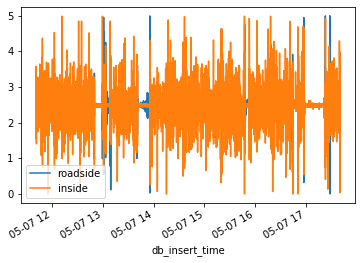

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='motion', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='motion', ax=ax)

ax.legend(['roadside', 'inside'], loc='best')

plt.show()

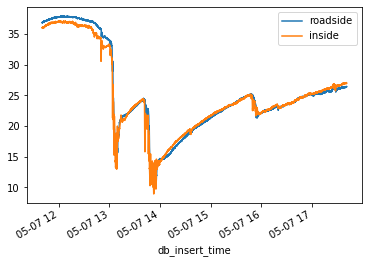

In [81]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='humidity', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='humidity', ax=ax)

ax.legend(['roadside', 'inside'], loc='best')

plt.show()

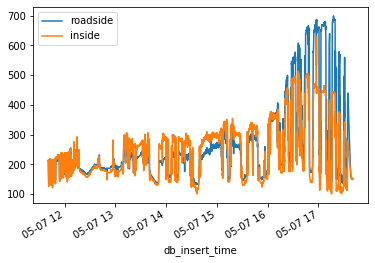

In [82]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='light', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='light', ax=ax)

ax.legend(['roadside', 'inside'], loc='best')

plt.show()

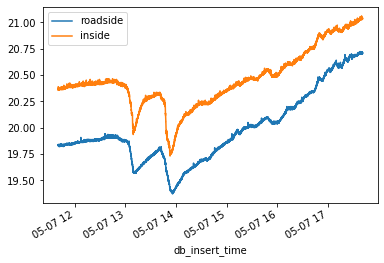

In [83]:
ax = plt.gca()

df1.plot(kind='line', x='db_insert_time', y='temperature', ax=ax)
df2.plot(kind='line', x='db_insert_time', y='temperature', ax=ax)

ax.legend(['roadside', 'inside'], loc='best')

plt.show()

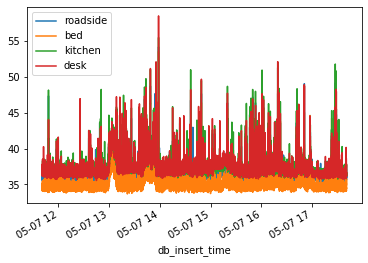

In [84]:
ax = plt.gca()

r1s1_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r1s2_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r2s1_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)
r2s2_df.plot(kind='line', x='db_insert_time', y='avg', ax=ax)

ax.legend(['roadside', 'bed', 'kitchen', 'desk'], loc='best')

plt.show()

## Integration with Particle platform

In [343]:
hroom3_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '1 hours' AND room = 'hroom-3' AND data_gen_time is NOT NULL
df = hroom3_result.DataFrame()
df.sort_values(by=['db_insert_time'])

 * postgresql://postgres@localhost/homedata
360 rows affected.


,db_insert_time,room,data_gen_time,sound1,sound2,temperature,humidity,light,motion,airquality,dustconcentration
23,2020-05-07 23:22:53.575899-04:00,hroom-3,2020-05-08 03:22:03-04:00,None,None,68.0,34.0,None,None,Fresh Air,1349.34880
24,2020-05-07 23:22:53.576435-04:00,hroom-3,2020-05-08 03:22:13-04:00,None,None,68.0,34.0,None,None,Fresh Air,1349.34880
25,2020-05-07 23:22:53.576803-04:00,hroom-3,2020-05-08 03:22:23-04:00,None,None,68.0,34.0,None,None,Fresh Air,1349.34880
26,2020-05-07 23:22:53.577144-04:00,hroom-3,2020-05-08 03:22:33-04:00,None,None,68.0,34.0,None,None,Fresh Air,1349.34880
27,2020-05-07 23:22:53.577507-04:00,hroom-3,2020-05-08 03:22:43-04:00,None,None,68.0,34.0,None,None,Fresh Air,1349.34880
...,...,...,...,...,...,...,...,...,...,...,...
355,2020-05-08 00:21:57.617113-04:00,hroom-3,2020-05-08 04:21:17-04:00,None,None,68.0,35.0,None,None,Fresh Air,299.62833
356,2020-05-08 00:21:57.617473-04:00,hroom-3,2020-05-08 04:21:27-04:00,None,None,68.0,35.0,None,None,Fresh Air,299.62833
357,2020-05-08 00:21:57.617841-04:00,hroom-3,2020-05-08 04:21:37-04:00,None,None,68.0,35.0,None,None,Fresh Air,299.62833
358,2020-05-08 00:21:57.618102-04:00,hroom-3,2020-05-08 04:21:47-04:00,None,None,68.0,35.0,None,None,Fresh Air,299.62833


## Insert an Item to DB Table

In [499]:
t = '2020-05-09 00:41:00'
act = 'phonecall'
start = 'end'
#start = 'end'
#%sql INSERT INTO user_activity (db_insert_time, room, data_gen_time, activity, start_end) VALUES (now(), 'hroom', '2020-05-07 11:01:00', 'personal_hygiene', 'end')
%sql INSERT INTO user_activity (db_insert_time, room, data_gen_time, activity, start_end) VALUES (now(), 'hroom', '{t}', '{act}', '{start}')


 * postgresql://postgres@localhost/homedata
1 rows affected.


[]

In [299]:
result = %sql SELECT * FROM user_activity
df = result.DataFrame()
df.sort_values(by=['data_gen_time'], inplace=True, ascending = True)

 * postgresql://postgres@localhost/homedata
42 rows affected.


# Mixed Visualization of Time Series data with Activity Labels

## Co-visualization of motion sensor TS and activity labels

In [22]:
import numpy as np
from datetime import datetime
from pytz import timezone

# constant variables
fc = {'work':'black', 
      'eating':'green', 
      'toilet':'purple', 
      'fitness':'red', 
      'sleep':'skyblue', 
      'personal_hygiene':'grey', 
      'shower':'blue', 
      'relax':'orange', 
      'cooking':'pink', 
      'phonecall':'teal', 
      'leave_home':'brown'}

# visualization targets and period
target_period = '96 hours'
vis_target = 'motion'

## Fetching database for the given period of time

In [23]:
hroom1_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '{target_period}' AND room = 'hroom-1'
hroom2_result = %sql SELECT * FROM sensor_data WHERE db_insert_time > now() - interval '{target_period}' AND room = 'hroom-2'
sensor_df1 = hroom1_result.DataFrame()
sensor_df2 = hroom2_result.DataFrame()
sensor_df1.sort_values('db_insert_time', ascending = True, inplace = True)
sensor_df2.sort_values('db_insert_time', ascending = True, inplace = True)

act_result = %sql SELECT data_gen_time, activity, start_end FROM user_activity WHERE data_gen_time > now() - interval '{target_period}'
act_df = act_result.DataFrame()
act_df.sort_values('data_gen_time', ascending = True, inplace = True)

 * postgresql://postgres@localhost/homedata
259123 rows affected.
 * postgresql://postgres@localhost/homedata
258460 rows affected.
 * postgresql://postgres@localhost/homedata
126 rows affected.


/Users/heesuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


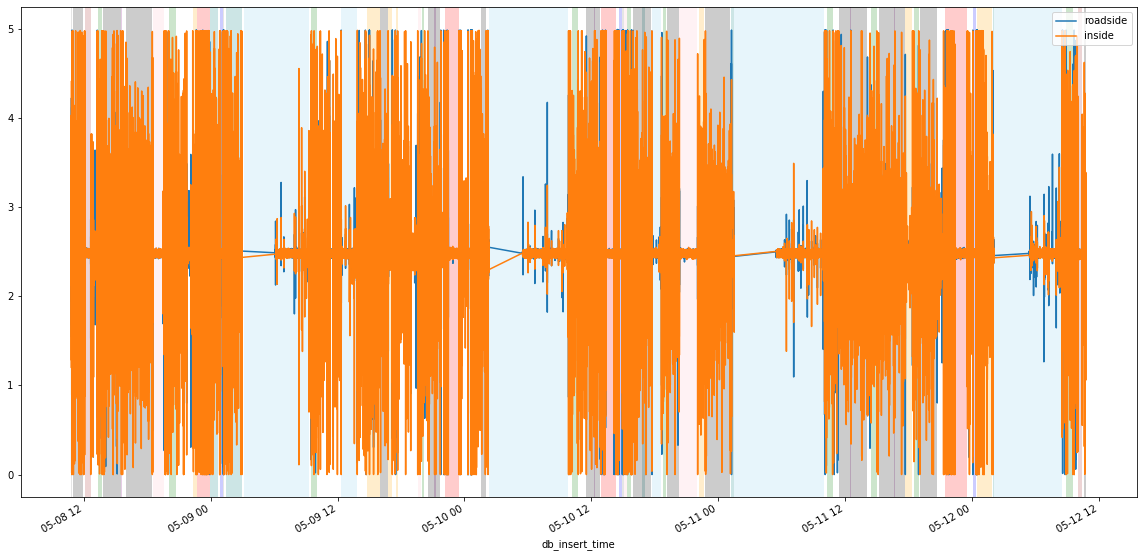

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

ax = plt.gca()

sensor_df1.plot(kind='line', x='db_insert_time', y=vis_target, ax=ax)
sensor_df2.plot(kind='line', x='db_insert_time', y=vis_target, ax=ax)

ax.legend(['roadside', 'inside'], loc='best')

act_stack = {} # stack implemented as a dict which stores unclosed/unfinished activities to be visualized

start_T = ''
end_T = ''

log = {'err':'', 'debug':''}

# converts numpy.datetime64 to datetime.
# datetime is compatible with pandas.timestamp with timezone.
def convT(T_dt64):
    T_ts = (T_dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    return datetime.fromtimestamp(T_ts).astimezone(timezone('US/Eastern'))

# visualize starts here
for index, row in act_df.iterrows():    
    act = row['activity']
    
    if row['start_end'] == 'start':
        if act in act_stack.keys():
            log['err'] += 'The given activity is already in the activity stack.' # error message
        else:
            act_stack[act] = {}
            log['debug'] += '{} is added to act_stack.\n'.format(act)
            #print('{} is added to act_stack.'.format(act))

            start_T = row['data_gen_time']

            if index == act_df.size-1: # if this is the last row
                end_T = convT(sensor_df1.tail(1)['data_gen_time'].values[0])
                log['debug'] += "act={}, start_T={}, end_T={}, color={}\n".format(act, str(start_T), str(end_T), fc[act])
                ax.axvspan(start_T, end_T, label = act, facecolor=fc[act], alpha=0.2)
                act_stack.pop(act)
                log['debug'] += '[1] act_stack.pop({})\n'.format(act)
            else:
                act_stack[act]['start_T'] = start_T
    else: # row['start_end'] == 'end'
        end_T = row['data_gen_time']
        
        if act in act_stack.keys():
            act_stack[act]['end_T'] = end_T
            log['debug'] += "act={}, start_T={}, end_T={}, color={}\n".format(act, str(act_stack[act]['start_T']), str(act_stack[act]['end_T']), fc[act])
            ax.axvspan(act_stack[act]['start_T'], act_stack[act]['end_T'], label = act, facecolor=fc[act], alpha=0.2)
            act_stack.pop(act)
            log['debug'] += '[2] act_stack.pop({})\n'.format(act)
        else:
            if start_T == '':
                start_T = convT(sensor_df1.head(1)['data_gen_time'].values[0])
            
            log['debug'] += "act={}, start_T={}, end_T={}, color={}\n".format(act, str(start_T), str(end_T), fc[act])
            ax.axvspan(start_T, end_T, label = act, facecolor=fc[act], alpha=0.2)
            
if len(act_stack.keys()) != 0:
    log['debug'] += "len(act_stack.keys()) = {}\n".format(len(act_stack.keys()))
    log['debug'] += "act_stack = {}\n".format(str(act_stack))
    
    for act in act_stack.keys():
        end_T = convT(sensor_df1.tail(1)['data_gen_time'].values[0])
        ax.axvspan(start_T, end_T, label = act, facecolor=fc[act], alpha=0.2)

#print(log['debug'])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### Color Mapping to Activities
* Work = Black
* Eating = Green
* Toilet = Purple
* Fitness = Red
* Sleep = Skyblue
* Personal_hygiene = Grey
* Shower = Blue
* Relax = Orange
* Cooking = Pink
* Phonecall = Teal